<a href="https://colab.research.google.com/github/akshitkaushik76/CODSOFT/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your ZIP file containing Churn_Modelling.csv:


Saving archive (1).zip to archive (1) (2).zip

=== Extracted files ===
- Churn_Modelling.csv

Data loaded. Shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



=== Model Evaluation ===
Accuracy: 0.8665

Confusion Matrix:


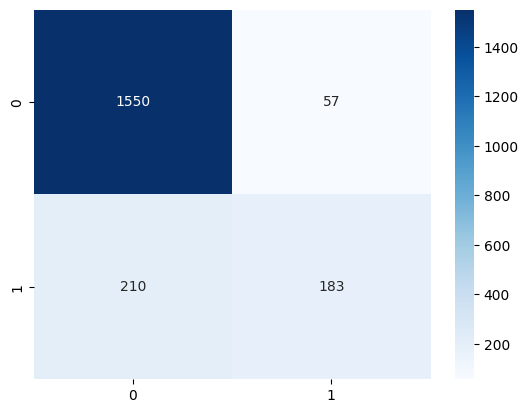


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Feature Importance:


,0
Age,0.236922
EstimatedSalary,0.147558
CreditScore,0.143338
Balance,0.141612
NumOfProducts,0.131486
Tenure,0.082080
IsActiveMember,0.040725
Geography_Germany,0.026190
HasCrCard,0.018454
Gender_Male,0.018421


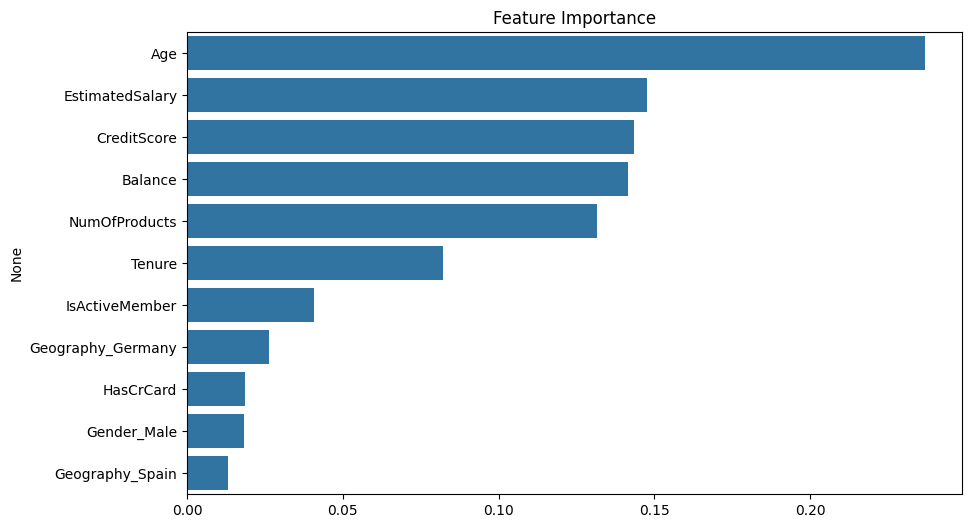

In [4]:



import zipfile, os, pandas as pd, sys
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("Upload your ZIP file containing Churn_Modelling.csv:")
uploaded = files.upload()
zip_path = list(uploaded.keys())[0]
extract_dir = "/content/churn_extracted"
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)


print("\n=== Extracted files ===")
for root, dirs, files in os.walk(extract_dir):
    for f in files:
        print("-", os.path.relpath(os.path.join(root, f), extract_dir))

csv_files = [f for f in os.listdir(extract_dir) if f.lower().endswith('.csv')]
if not csv_files:
    raise SystemExit("No CSV file found in the ZIP.")
data_path = os.path.join(extract_dir, csv_files[0])
data = pd.read_csv(data_path)
print("\nData loaded. Shape:", data.shape)
display(data.head())


data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)


X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("\n=== Model Evaluation ===")
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)
print("\nFeature Importance:")
display(feat_importances)


plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importance")
plt.show()
